###A continuación se encuentra el código utilizado para el trabajo práctico que tiene como objetivo realizar un análisis descriptivo y exploratorio de un dataset sobre precios de casas en boston brindado por la cátedra, junto con la implementación de distintos modelos predictivos para la estimación del precio de una casa en dicha ciudad

Librerías a utilizar durante el trabajo

In [210]:
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, ElasticNetCV, RidgeCV
from sklearn.metrics import PredictionErrorDisplay
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

Descripción de las variables a utilizar en el trabajo práctico:

1) CRIM: tasa de criminalidad per cápita por ciudad

2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados

3) INDUS: proporción de acres de negocios no minoristas por ciudad

4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)

5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]

6) RM: número promedio de habitaciones por vivienda

7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8) DIS: distancias ponderadas a cinco centros de empleo de Boston

9) RAD: índice de accesibilidad a las autopistas radiales

10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]

11) PTRATIO: proporción alumno-maestro por ciudad

12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

13) LSTAT: % de población de menor estatus socioeconómico









Nuestra variable de salida o target será 'MEDV'

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


## 3

### Análisis descriptivo

In [211]:
data=pd.read_csv("/content/house-prices-tp.csv")

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [213]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Lo primero que descrubrimos es la falta de valores en 21 valores de la columna
respuesta (MEDV) que representa aprox 3.8% de los datos totales.
Procedemos a dropearlos

### Decisión sobre datos faltantes

Eliminamos registros con valores faltantes en la variable 'MEDV' por ser la variable de salida

In [214]:
data = data.dropna(subset=['MEDV'])

Separamos variables predictoras y variable de salida

In [215]:
X = data.drop(columns=['MEDV'])
y = data['MEDV']

### Visualización de datos

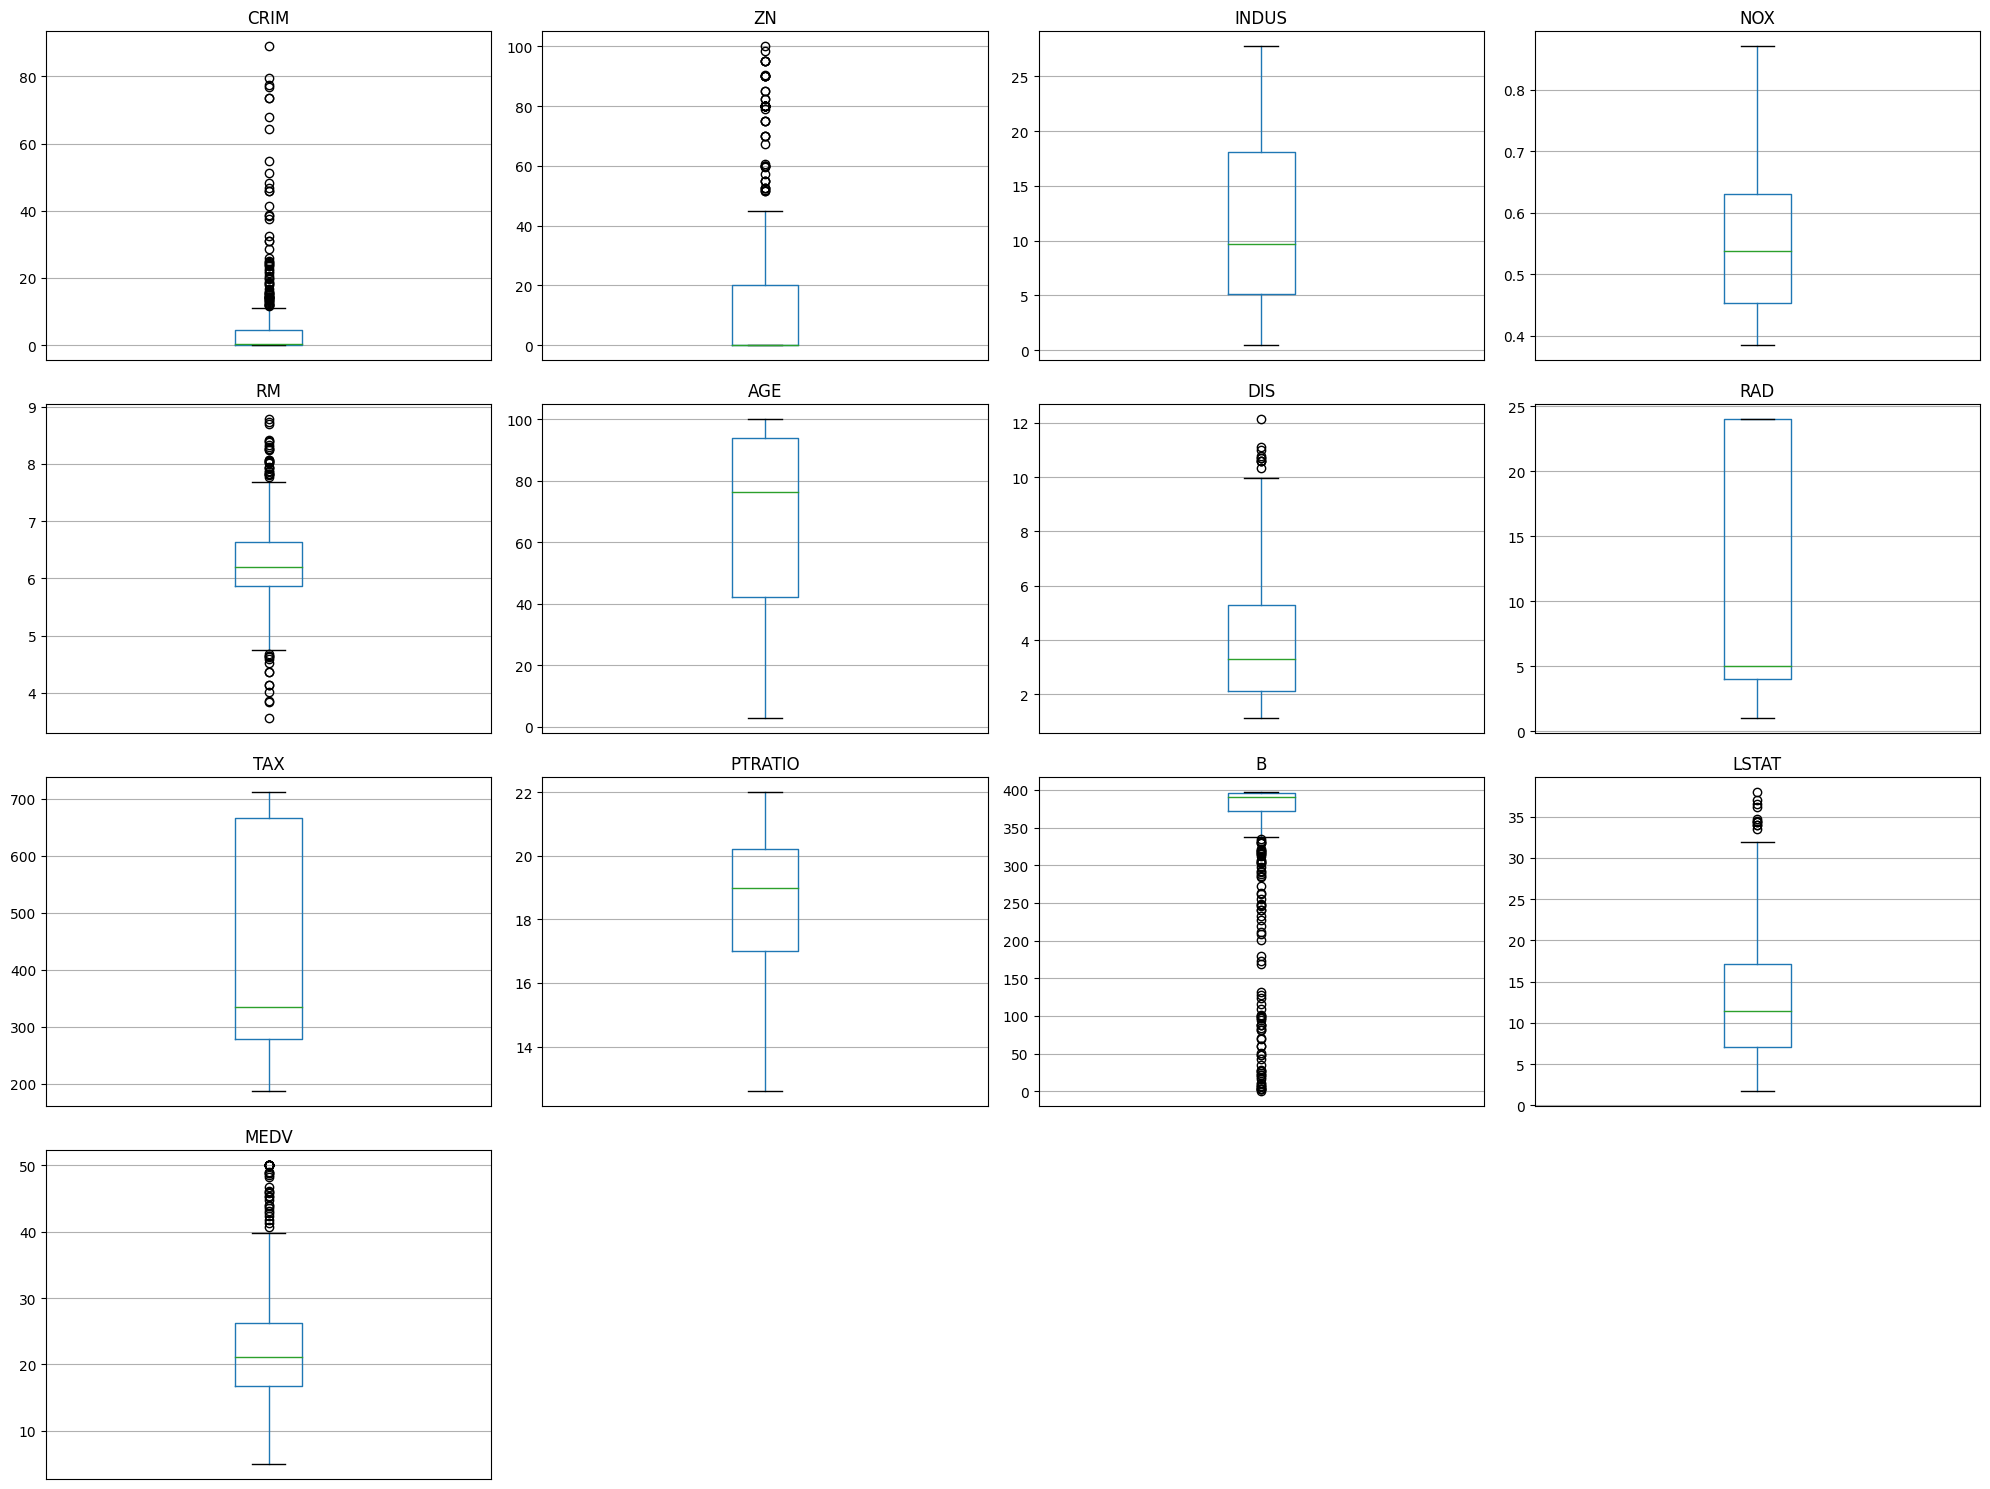

In [216]:
# Crear diagrama de caja individual para cada variable para ver su distribución
data_box = data.drop(columns=['CHAS'])

plt.figure(figsize=(20, 15))
for i, box in enumerate(data_box.columns):
    plt.subplot(4, 4, i+1)
    data_box.boxplot(column=box)
    plt.title(box)
    plt.xticks([])
plt.tight_layout()
plt.show()

Para poder apreciar mejor la distribución de las variables, las vemos en un histograma

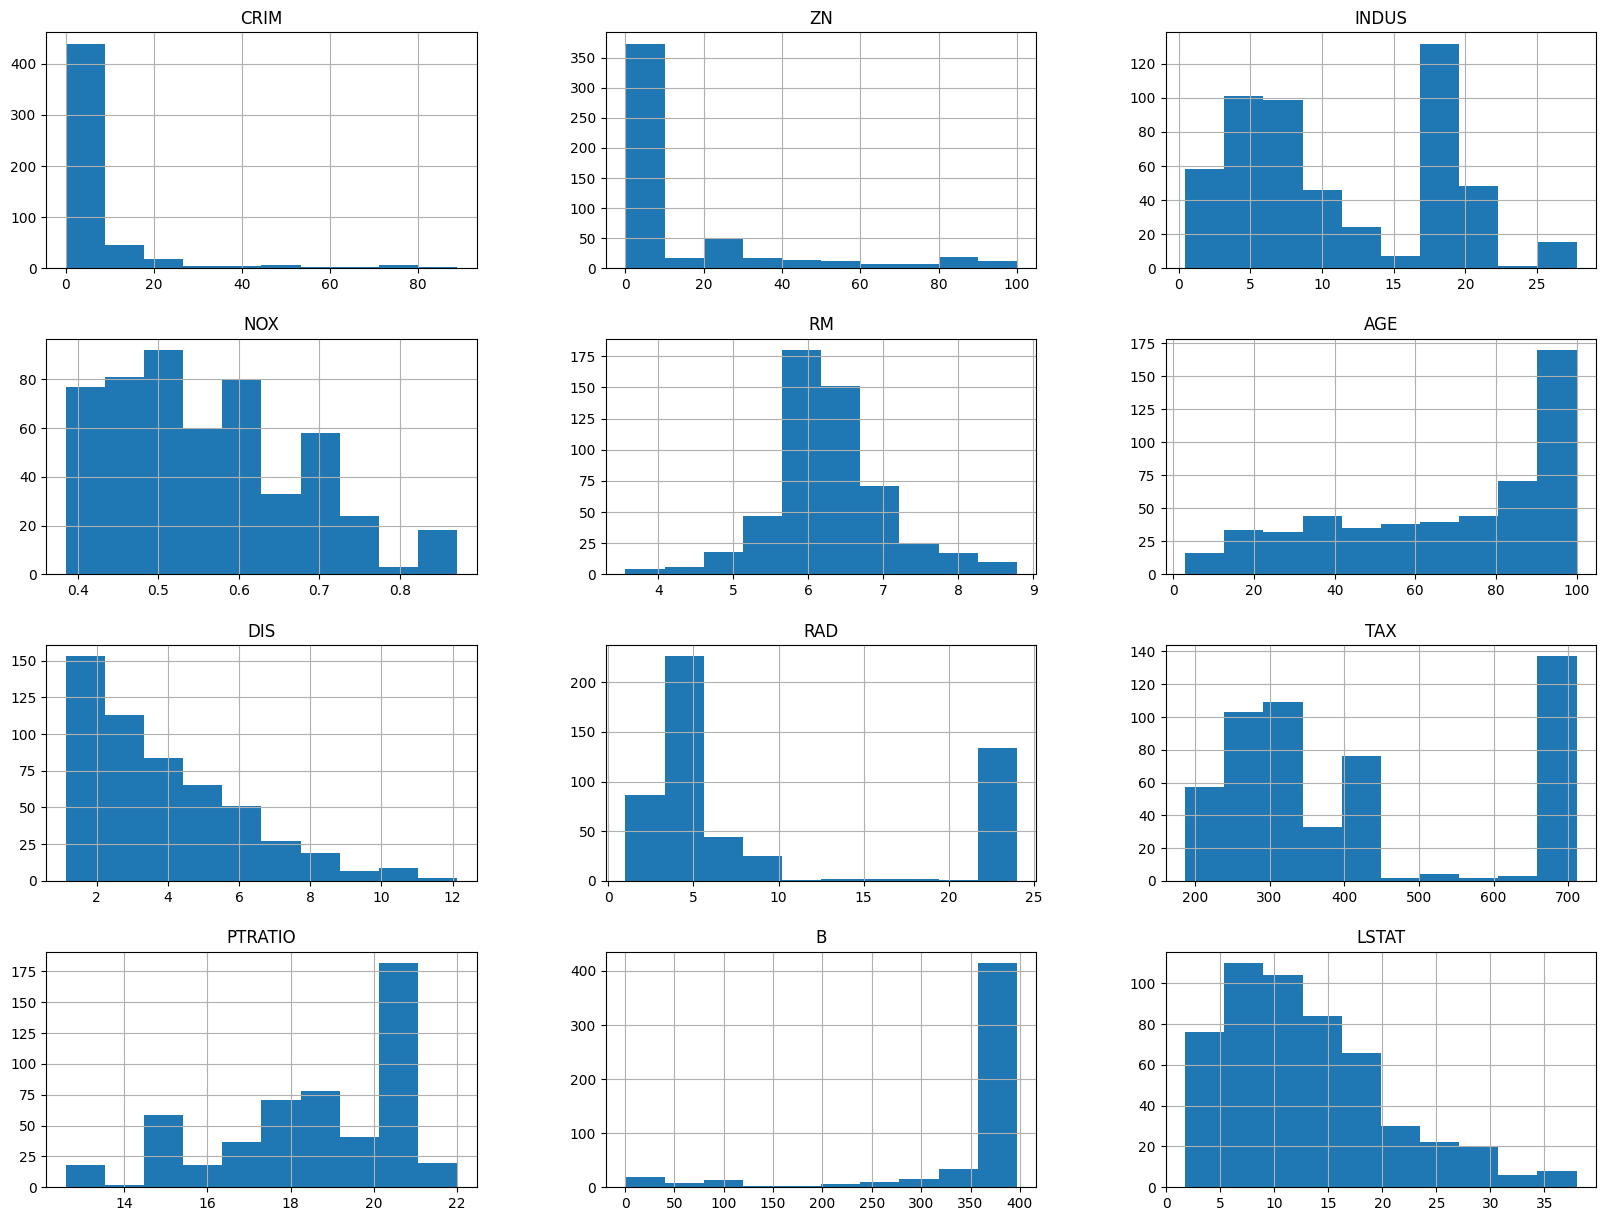

In [217]:
# Distribución de las variables con histogramas, sin tener en cuenta la variabla 'CHAS' por ser una variable categórica
X.drop(columns=['CHAS']).hist(figsize=(20,15))
plt.show()

Notamos que muchas de las variables presentan sesgos. La única que pareciera tener una distribución similar a la normal es RM.

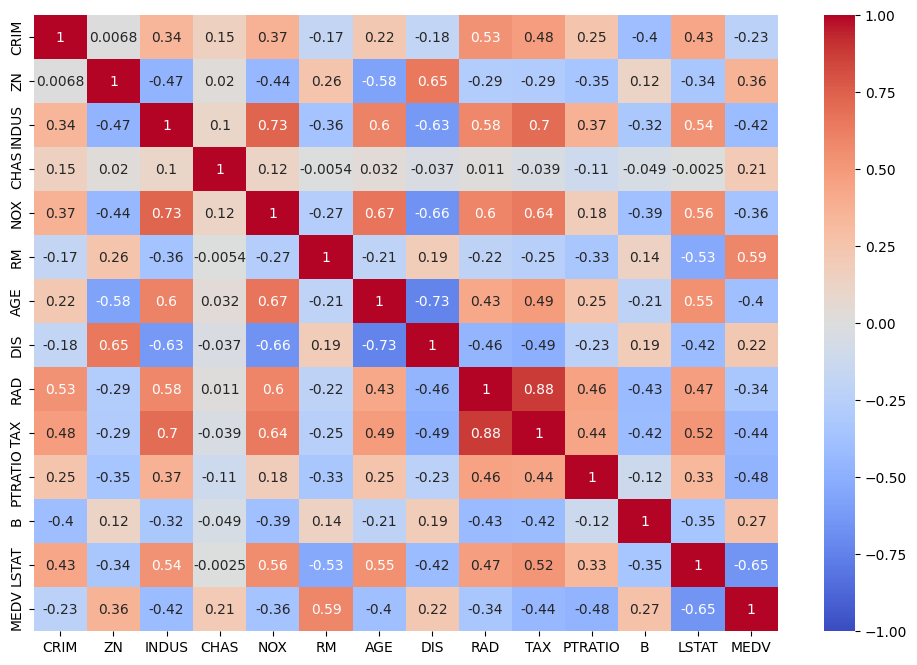

In [218]:
# Matriz de correlación de variables
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin = -1)
plt.show()

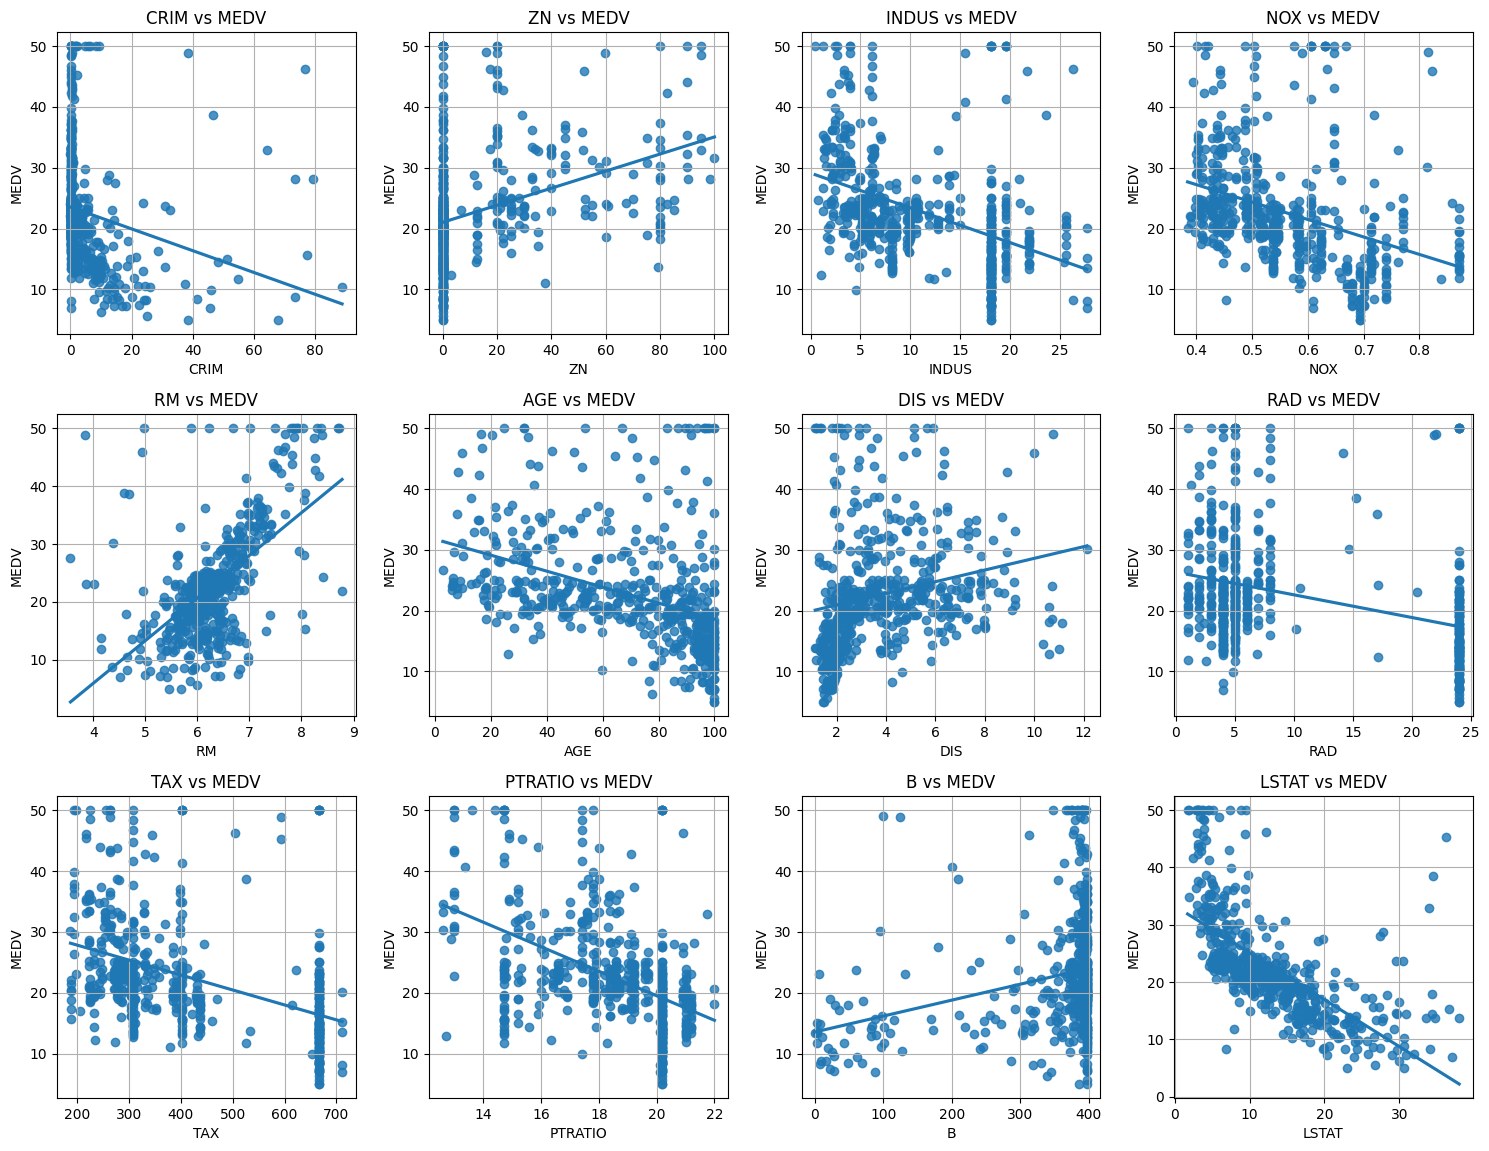

In [219]:
# scatterplot para cada variable con respecto al target o rta

variables = X.columns
variables = variables.drop('CHAS')
n_variables = len(variables)

plt.figure(figsize=(15, 15)) # Define el tamaño de las figuras a mostrar

# Iterar sobre las 13 variables y generar los scatterplots
for i, var in enumerate(variables):
    plt.subplot(4, 4, i+1)  # Ajusta el número de filas y columnas según el número de variables
    sns.regplot(x = X[var], y = y, ci = None)
    plt.title(f'{var} vs MEDV')
    plt.grid()

# Ajustar los subplots para que no se solapen
plt.tight_layout()
plt.show()

Analizando el mapa, vemos que las correlaciones mas fuertes con nuestra variable target se dan con las variables LSTAT, RM y PTRATIO.

In [220]:
# Analizamos observaciones con 4 o más valores faltantes en sus variables
X[X.isnull().sum(axis = 1) >= 4].shape

(12, 13)

In [221]:
# Eliminación de estas observaciones
y = y.drop(index = X[X.isnull().sum(axis = 1) >= 4].index) # Primero la 'y' para no perder los indices
X = X.drop(index = X[X.isnull().sum(axis = 1) >= 4].index)

Decidimos sacar de nuestro dataset estas 12 observaciones que perdían mas de un tercio de las variables a utilizar

### Validación cruzada

In [222]:
# División en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_cont = X_train.columns.drop('CHAS') # Separamos CHAS ya que solo puede ser 0 o 1

In [223]:
# Realizamos escalado standard
Scaler = StandardScaler()
Scaler.fit(X_train[X_cont])
X_train2 = X_train.copy()
X_train2[X_cont] = Scaler.transform(X_train[X_cont])

In [224]:
X_train2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
230,1.637373,2.183187,1.418491,0.0,2.607612,2.914083,0.142978,0.843967,0.876663,NaN,0.788554,0.179259,-0.465460
73,-0.409543,2.689789,-1.323951,0.0,-1.016348,0.475472,-1.299942,1.988749,-0.639420,-0.760306,-0.706709,0.392736,-0.914844
380,-0.409597,1.887039,-1.191135,0.0,-1.306903,0.433146,-1.682799,1.026626,-0.984911,-0.849334,-1.364235,0.240349,-1.131307
321,-0.237733,-0.521213,1.212555,0.0,0.436427,2.242254,1.035841,-0.863606,-0.524256,-0.030273,-1.786930,0.161159,-1.222732
180,-0.366045,0.281538,-1.040995,0.0,0.795347,2.882610,0.870755,-0.753734,-0.524256,-0.855270,-2.585354,0.349075,-0.925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.037101,-0.521213,0.998894,1.0,1.846472,-0.218133,0.586246,-0.557089,1.663858,1.530691,0.796207,0.440786,-0.176721
112,0.077420,-0.521213,0.998894,1.0,0.658616,0.541009,1.056915,-1.175738,1.663858,1.530691,0.796207,0.225688,-1.218698
283,-0.393909,0.361813,-0.768143,0.0,-1.050531,-0.082962,0.438723,1.858089,-0.293928,-0.463545,0.279579,0.234356,-0.355538
463,-0.406686,2.689789,-1.088635,0.0,-1.383814,-0.244075,-1.219155,2.385617,-0.984911,-0.552573,-0.988506,0.413604,-0.836864


In [225]:
# Con el método de escalado vemos que contamos con 48 observaciones con valores atipicos
(abs(X_train2) > 3).any(axis = 1).sum()

48

Como las variables no se distribuyen normalmente, el escalado standard nos da muchos outliers. Para poder evitar este problema vamos a utilizar el PowerTransformer


In [226]:
# Realizamos escalado PowerTransformer
Scaler = PowerTransformer()
Scaler.fit(X_train[X_cont])
X_train[X_cont] = Scaler.transform(X_train[X_cont])
X_test[X_cont] = Scaler.transform(X_test[X_cont])

In [227]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.150000e+02,4.140000e+02,4.180000e+02,417.000000,4.170000e+02,4.160000e+02,4.140000e+02,4.160000e+02,4.110000e+02,4.150000e+02,4.150000e+02,4.160000e+02,4.160000e+02
mean,-1.155702e-16,5.470664e-17,5.864527e-16,0.091127,3.663470e-16,9.159340e-16,-1.179947e-16,1.729386e-16,1.253390e-16,-8.321055e-15,3.852340e-17,-7.686159e-17,1.281027e-17
std,1.001207e+00,1.001210e+00,1.001198e+00,0.288135,1.001201e+00,1.001204e+00,1.001210e+00,1.001204e+00,1.001219e+00,1.001207e+00,1.001207e+00,1.001204e+00,1.001204e+00
min,-1.021252e+00,-6.420978e-01,-2.209682e+00,0.000000,-1.877932e+00,-3.778173e+00,-2.002446e+00,-1.993254e+00,-2.239284e+00,-2.018644e+00,-1.991883e+00,-2.696605e+00,-2.497987e+00
25%,-8.592369e-01,-6.420978e-01,-8.000605e-01,0.000000,-9.590069e-01,-5.370586e-01,-9.146347e-01,-8.692486e-01,-5.216642e-01,-7.431404e-01,-7.130187e-01,5.693612e-03,-7.604444e-01
50%,-5.496392e-01,-6.420978e-01,-2.514924e-02,0.000000,-1.346359e-02,-7.417005e-02,1.903578e-01,2.276673e-02,-2.403991e-01,-2.479886e-01,1.272028e-01,4.693343e-01,2.257757e-02
75%,1.168116e+00,1.488689e+00,9.986338e-01,0.000000,7.572292e-01,5.046876e-01,9.412186e-01,8.586184e-01,1.441181e+00,1.365904e+00,8.211030e-01,6.108983e-01,7.296107e-01
max,1.768573e+00,1.649412e+00,1.870391e+00,1.000000,2.007363e+00,3.117210e+00,1.220103e+00,2.188319e+00,1.441181e+00,1.490095e+00,2.263087e+00,6.358460e-01,2.285386e+00


Las variables transformadas tienen una media cercana al 0 y una varianza = 1 por lo que podemos realizar imputacion por KNN

In [228]:
# Verificación de outliers
outlier = (abs(X_train) > 3).any(axis = 1)
print(outlier.sum())

5


In [229]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.150000e+02,4.140000e+02,4.180000e+02,417.000000,4.170000e+02,4.160000e+02,4.140000e+02,4.160000e+02,4.110000e+02,4.150000e+02,4.150000e+02,4.160000e+02,4.160000e+02
mean,-1.155702e-16,5.470664e-17,5.864527e-16,0.091127,3.663470e-16,9.159340e-16,-1.179947e-16,1.729386e-16,1.253390e-16,-8.321055e-15,3.852340e-17,-7.686159e-17,1.281027e-17
std,1.001207e+00,1.001210e+00,1.001198e+00,0.288135,1.001201e+00,1.001204e+00,1.001210e+00,1.001204e+00,1.001219e+00,1.001207e+00,1.001207e+00,1.001204e+00,1.001204e+00
min,-1.021252e+00,-6.420978e-01,-2.209682e+00,0.000000,-1.877932e+00,-3.778173e+00,-2.002446e+00,-1.993254e+00,-2.239284e+00,-2.018644e+00,-1.991883e+00,-2.696605e+00,-2.497987e+00
25%,-8.592369e-01,-6.420978e-01,-8.000605e-01,0.000000,-9.590069e-01,-5.370586e-01,-9.146347e-01,-8.692486e-01,-5.216642e-01,-7.431404e-01,-7.130187e-01,5.693612e-03,-7.604444e-01
50%,-5.496392e-01,-6.420978e-01,-2.514924e-02,0.000000,-1.346359e-02,-7.417005e-02,1.903578e-01,2.276673e-02,-2.403991e-01,-2.479886e-01,1.272028e-01,4.693343e-01,2.257757e-02
75%,1.168116e+00,1.488689e+00,9.986338e-01,0.000000,7.572292e-01,5.046876e-01,9.412186e-01,8.586184e-01,1.441181e+00,1.365904e+00,8.211030e-01,6.108983e-01,7.296107e-01
max,1.768573e+00,1.649412e+00,1.870391e+00,1.000000,2.007363e+00,3.117210e+00,1.220103e+00,2.188319e+00,1.441181e+00,1.490095e+00,2.263087e+00,6.358460e-01,2.285386e+00


PowerTransform normaliza las variables por lo que todos tienen media cercana a 0 y varianza 1, que nos resulta útil para próximos métodos.

In [230]:
# Inspección de estos indices
outlier_index = outlier.index[outlier == True]
print(X_train.loc[outlier_index])

         CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
166  1.543132 -0.642098  0.998634   0.0  0.807017 -3.736122  1.220103   
209 -0.160087 -0.642098 -0.601808   0.0 -0.298736  3.055195  0.553528   
163  1.606990 -0.642098  0.998634   0.0  1.052740 -3.253026  1.220103   
264  1.707885  1.616313  0.724265   1.0  0.501794 -3.778173 -1.579489   
440  1.041800 -0.642098  0.998634   1.0  1.343253  3.117210  0.549693   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
166 -1.490467  1.441181  1.365904  0.821103 -2.636035  0.304675  
209 -0.288334  0.324781 -0.447261 -0.713019  0.203322 -1.342590  
163 -1.982342  1.441181  1.365904  0.821103  0.635846  2.285386  
264 -0.283901  1.360114  1.136121       NaN -2.648286 -1.751101  
440 -1.069629  1.441181  1.365904  0.821103 -0.484844 -1.156632  


Solo existe 5 observaciones con outliers, siendo todos estos encontrados en la variable RM que ya se encontraba distribuída normalmente.

In [231]:
# Imputación de los nulls por moda de la variable 'CHAS' por ser categórica (Esto puede hacer que las que en realidad eran 1 sean subestimadas)
X_train['CHAS'].fillna(X_train['CHAS'].mode()[0], inplace=True)
X_test['CHAS'].fillna(X_train['CHAS'].mode()[0], inplace=True)

In [232]:
data.groupby('CHAS')['MEDV'].mean()

,MEDV
CHAS,
0.0,22.158317
1.0,29.090903


In [233]:
X_train.shape

(418, 13)

In [234]:
# Realizamos imputación de nulls restantes con el método basado en modelos (K-Vecinos más cercanos, KNN)
knn_imputer = KNNImputer(n_neighbors = 20) # k = 20 por regla de la raíz
X_train = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
print("\nDataFrame después de la imputación basada en K-Vecinos más cercanos:")
X_train.head()


DataFrame después de la imputación basada en K-Vecinos más cercanos:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.648236,1.625379,1.285376,0.0,1.965303,2.708210,0.093063,0.989529,1.133686,1.337159,0.809860,-0.088948,-0.293085
1,-1.000184,1.636701,-1.601468,0.0,-1.131843,0.502367,-1.305010,1.602396,-0.521664,-0.711453,-0.875037,0.457593,-0.977311
2,-1.001676,1.616876,-1.330714,0.0,-1.624160,0.461193,-1.620988,1.106554,-2.239284,-0.875158,-1.350899,0.059799,-1.418076
3,0.721255,-0.642098,1.147752,0.0,0.616367,2.130388,1.068669,-0.937399,-0.240399,0.268373,-1.591038,-0.131878,-1.640232
4,-0.167749,1.488689,-1.068117,0.0,0.916772,2.681595,0.883262,-0.728697,-0.240399,-0.886559,-1.930390,0.339626,-0.996983


### Linear Regression

# Probaremos con distintos métodos para dar una solución al problema

Elegimos RMSE (Root Mean Square Error) como métrica principal porque: RMSE tiene la ventaja de que sus unidades están en la misma escala que la variable objetivo, lo que facilita la interpretación del error. En este caso, como predecimos precios de casas, el RMSE nos dice en promedio cuántas unidades de dolar se desvía el modelo de los precios reales.

In [235]:
# Regresión lineal

model = LinearRegression()

model.fit(X_train, y_train)

pendiente = model.coef_ #[0]

intercepto = model.intercept_

pendiente, intercepto

(array([ 2.43010791,  0.89934455, -0.16115791,  6.05736928, -1.73183095,
         1.4786355 , -0.3649347 , -2.80458224,  0.5582415 , -2.69120141,
        -1.08934574,  0.22459667, -5.50899893]),
 22.206682931286917)

In [236]:
y_pred = model.predict(X_test)

In [237]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.7091485004999096, 0.6583306900540529)

In [238]:
RMSE_train = mean_squared_error(y_train, model.predict(X_train), squared=False)
RMSE_test = mean_squared_error(y_test, y_pred, squared=False)

print('RMSE en el conjunto de entrenamiento: {}'.format(round(RMSE_train, 2)))
print('RMSE en el conjunto de prueba: {}'.format(round(RMSE_test, 2)))


RMSE en el conjunto de entrenamiento: 4.98
RMSE en el conjunto de prueba: 5.7


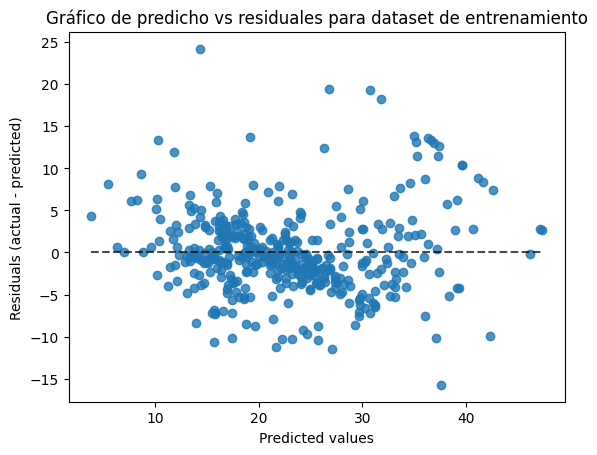

In [239]:
display = PredictionErrorDisplay(y_true=y_train, y_pred= model.predict(X_train))
display.plot()
plt.title('Gráfico de predicho vs residuales para dataset de entrenamiento')
plt.show()

Hay 1 un punto en el dataset que es un outlier notorio, luego vamos a investigar a que se debe el error tan grande

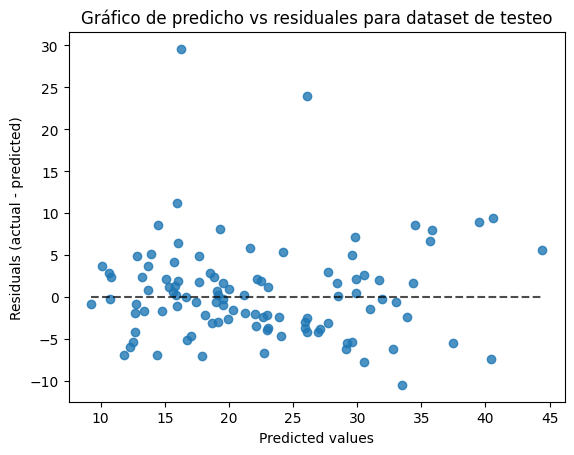

In [240]:
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()
plt.title('Gráfico de predicho vs residuales para dataset de testeo')
plt.show()

Notamos que pasa lo mismo en un punto en el dataset de testeo

In [241]:
# Analizamos el outlier en particular
residual = y_train - model.predict(X_train)
data.loc[residual[residual > 20].index]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
268,NaN,NaN,14.566883,1.0,0.527807,4.679936,13.122262,4.401142,15.239579,280.681821,NaN,355.316828,34.48294,38.516709


El alto error en este caso se debe por la imputacion de 3 datos faltante (la suma de errores en las estimaciones de estos se traslada a la prediccion)

### Probamos con GD, SGD y con mini-batch GD

In [242]:
def gradient_descent(X_train, y_train, X_val, y_val, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_val = oxm
        y_test = ox1
        W = (m+1)x1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_val.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_val = np.hstack((np.ones((o, 1)), X_val))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for _ in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_val, W)
        error_test = y_val - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de validación')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y validación vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

In [243]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)



    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [244]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

In [245]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((418, 13), (418,), (105, 13), (105,))

In [246]:
# Aplicamos el reshape solo sobre y ya que es la que no tiene la 2da componente
y_train_resh = y_train.values.reshape(-1,1)
y_test_resh = y_test.values.reshape(-1,1)

In [247]:
X_train.shape, y_train_resh.shape, X_test.shape, y_test_resh.shape

((418, 13), (418, 1), (105, 13), (105, 1))

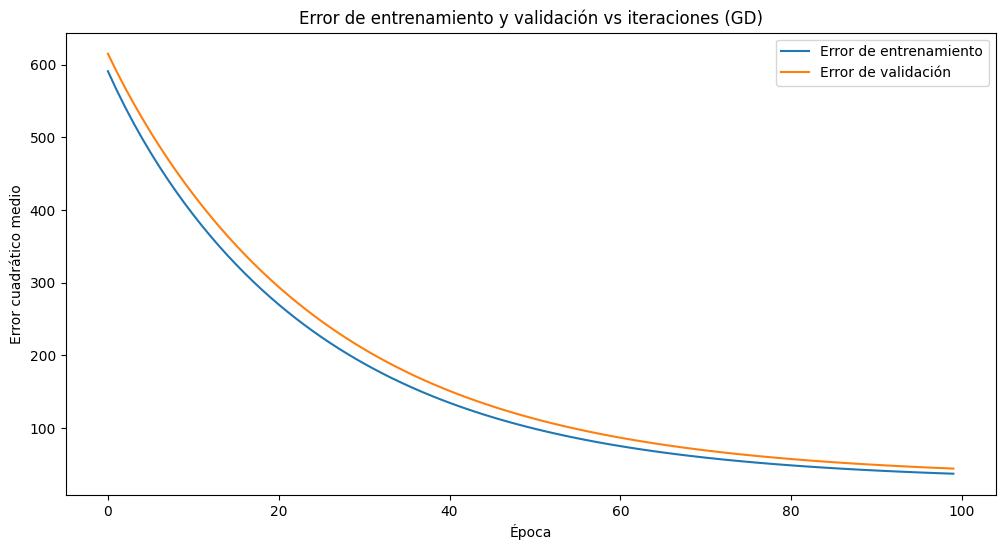

array([[19.55078442],
       [ 1.09080953],
       [ 0.09313623],
       [-0.18206543],
       [ 3.25423503],
       [-1.05212356],
       [ 1.85753525],
       [-0.4835932 ],
       [-1.21513252],
       [ 0.30533746],
       [-1.17154566],
       [-1.57185836],
       [ 0.20245669],
       [-4.24877303]])

In [248]:
gradient_descent(X_train, y_train_resh, X_test, y_test_resh)

Con los parámetros por default no llegamos a ver la convergencia del algoritmo

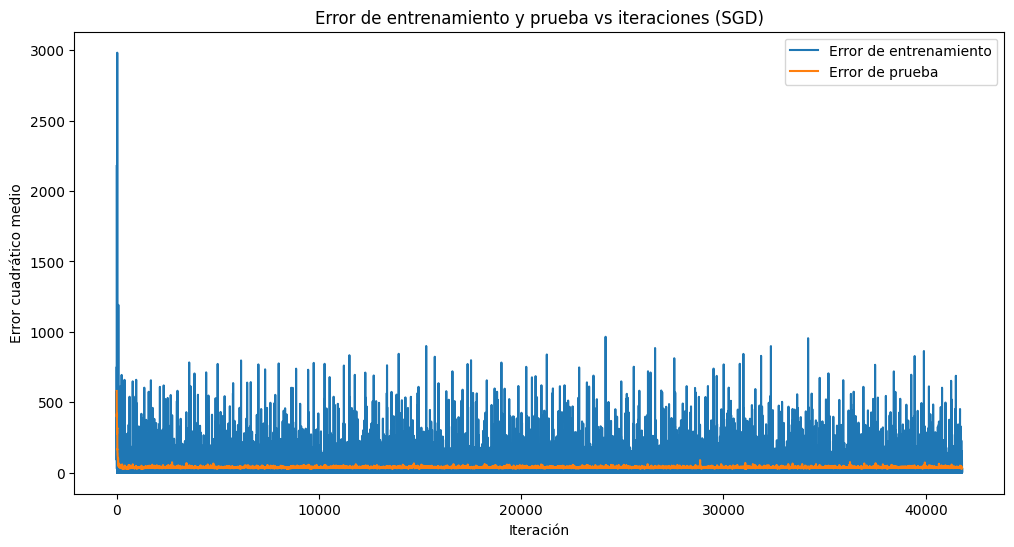

array([[23.34285655],
       [ 2.73393928],
       [ 1.28714607],
       [-0.6304425 ],
       [ 6.28304629],
       [-1.23975622],
       [ 1.32234322],
       [-0.38778638],
       [-3.16395584],
       [ 0.70709216],
       [-2.7479755 ],
       [-1.1276607 ],
       [ 0.7261558 ],
       [-6.33771539]])

In [249]:
stochastic_gradient_descent(X_train, y_train_resh, X_test, y_test_resh)

Pareciera converger mucho mas rápido que GD, con bastante ruido (normal del algoritmo estocástico)

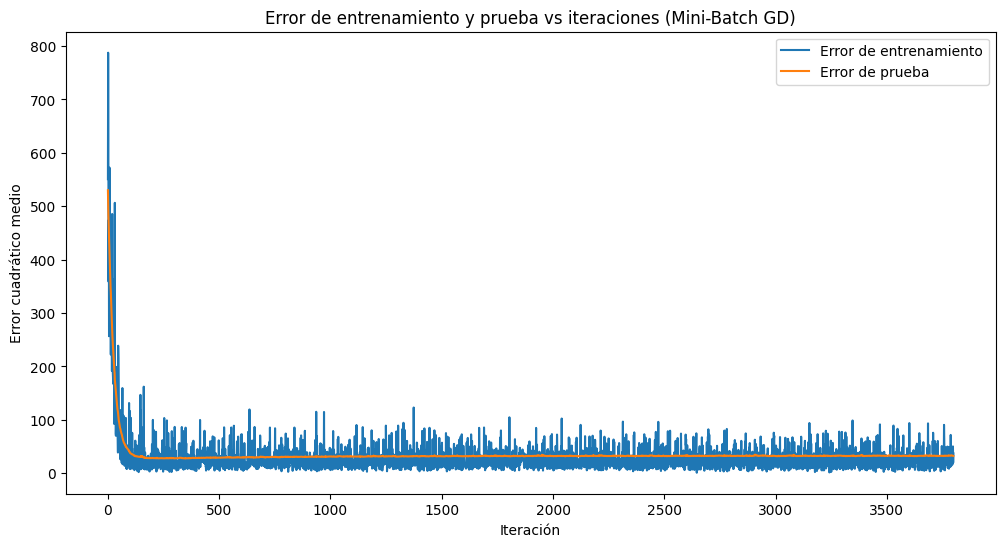

array([[22.25154484],
       [ 2.43131456],
       [ 0.92283421],
       [-0.15230178],
       [ 6.05699613],
       [-1.77364823],
       [ 1.45599344],
       [-0.43936984],
       [-2.75866926],
       [ 0.55183367],
       [-2.70428763],
       [-1.09890554],
       [ 0.20109636],
       [-5.5178674 ]])

In [250]:
mini_batch_gradient_descent(X_train, y_train_resh, X_test, y_test_resh)

Pudimos observar que luego de varias pruebas, ajustando mucho el ratio de aprendizaje GD termina en menos iteraciones que SGD y mini-batch

In [251]:

lasso = Lasso(alpha = 1)
ridge = Ridge(alpha= 1)
elasticnet = ElasticNet(alpha = 1, l1_ratio=0.5)

for modelo in [lasso, ridge, elasticnet]:
  modelo.fit(X_train, y_train)
  RMSE_train = mean_squared_error(y_train, modelo.predict(X_train), squared=False)
  RMSE_test = mean_squared_error(y_test, modelo.predict(X_test), squared=False)

  print(f'RMSE de {modelo} en el conjunto de entrenamiento: {round(RMSE_train, 2)}')
  print(f'RMSE de {modelo} en el conjunto de prueba: {round(RMSE_test, 2)}\n')

RMSE de Lasso(alpha=1) en el conjunto de entrenamiento: 5.88
RMSE de Lasso(alpha=1) en el conjunto de prueba: 5.95

RMSE de Ridge(alpha=1) en el conjunto de entrenamiento: 4.98
RMSE de Ridge(alpha=1) en el conjunto de prueba: 5.68

RMSE de ElasticNet(alpha=1) en el conjunto de entrenamiento: 6.08
RMSE de ElasticNet(alpha=1) en el conjunto de prueba: 6.2



En el punto anterior no conseguimos un buen fiting ya que no ajustamos los modelos con los hiperparámetros óptimos. A continuación intentaremos mejorarlos.

#5

Ajustaremos parámetros de GD, SGD y mini-batch

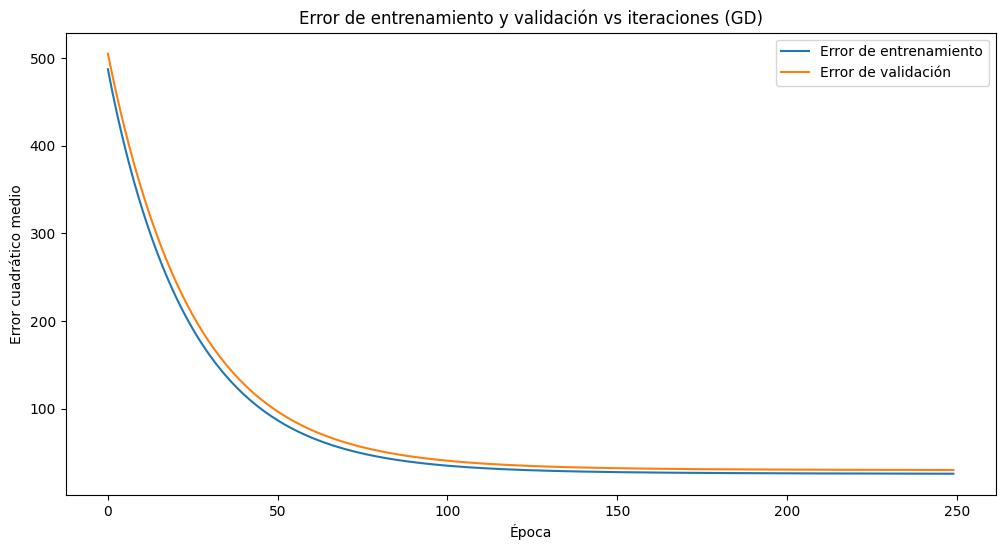

array([[22.35674813],
       [ 1.35075547],
       [ 0.93757825],
       [-0.15468587],
       [ 3.20992874],
       [-1.14575208],
       [ 1.77200653],
       [-0.57011293],
       [-2.68599739],
       [ 0.80279947],
       [-2.16732093],
       [-1.29016982],
       [ 0.12772917],
       [-5.04717126]])

In [252]:
gradient_descent(X_train, y_train_resh, X_test, y_test_resh, epochs=250)

Podemos ver que el algoritmo converge aproximadamente entre las iteraciones 100 y 150 aprox.

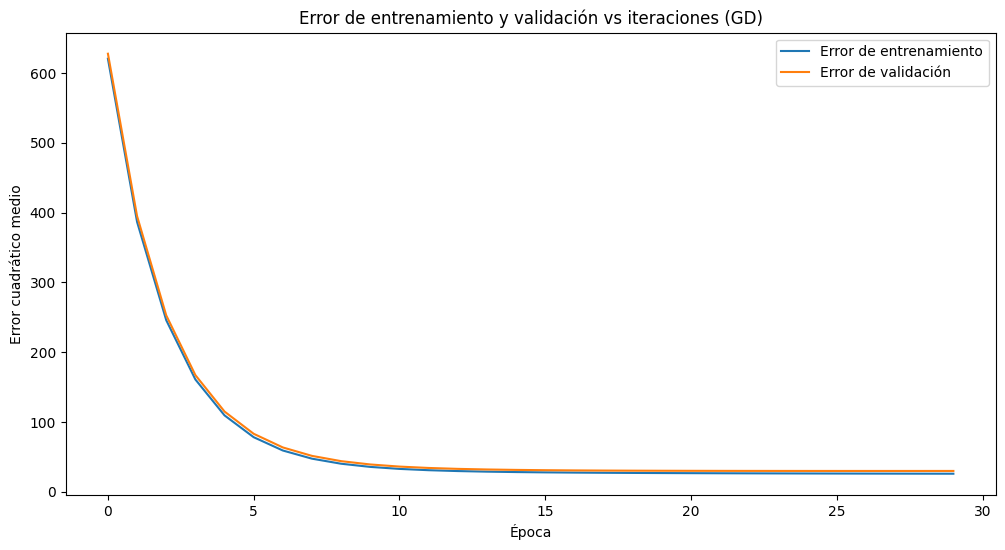

array([[22.44244542],
       [ 1.53681007],
       [ 0.94638382],
       [-0.28637901],
       [ 3.48724679],
       [-0.9082129 ],
       [ 1.52530359],
       [-0.12754999],
       [-2.26486904],
       [ 0.56134611],
       [-2.03590744],
       [-1.22804713],
       [ 0.12236884],
       [-5.50221455]])

In [253]:
# Aumentando el ratio de aprendizaje
gradient_descent(X_train, y_train_resh, X_test, y_test_resh, lr=0.11, epochs=30)

Se puede llegar a un resultado mucho más optimo, en bajas iteraciones.

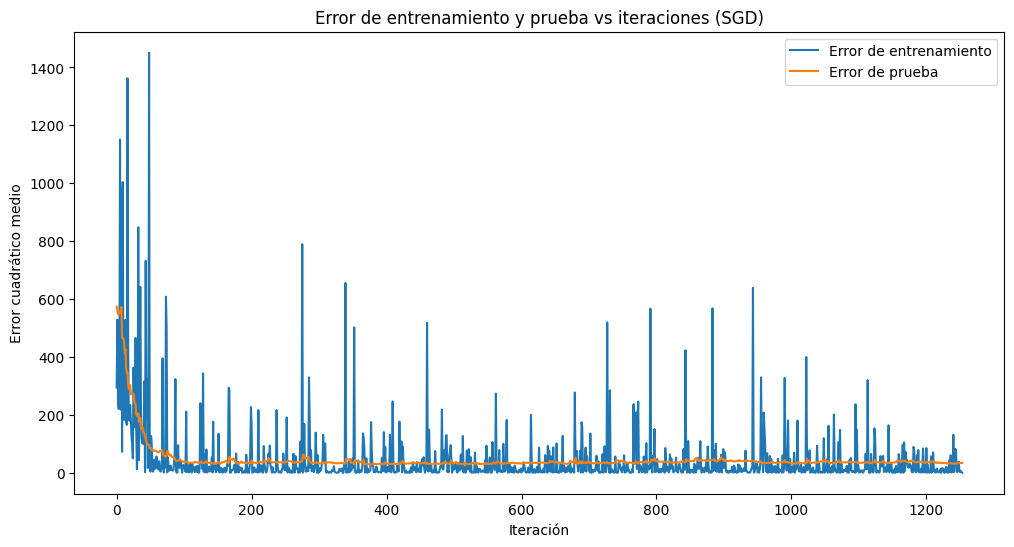

array([[ 2.27060498e+01],
       [ 2.91009306e+00],
       [ 1.02231139e+00],
       [-8.51815978e-02],
       [ 5.60120084e+00],
       [-1.38931841e+00],
       [ 1.71087312e+00],
       [-3.68080854e-01],
       [-2.38065244e+00],
       [ 5.57574924e-01],
       [-2.38982475e+00],
       [-6.93657336e-01],
       [-1.62429474e-02],
       [-5.07948607e+00]])

In [254]:
stochastic_gradient_descent(X_train, y_train_resh, X_test, y_test_resh, lr=0.01, epochs=3)

Ajustando el numero de iteraciones podemos disminuir el ruido y apreciar un poco mejor la convergencia

In [255]:
# buscamos un tamaño "optimo"
batch_size = int(np.sqrt(len(X_train)))

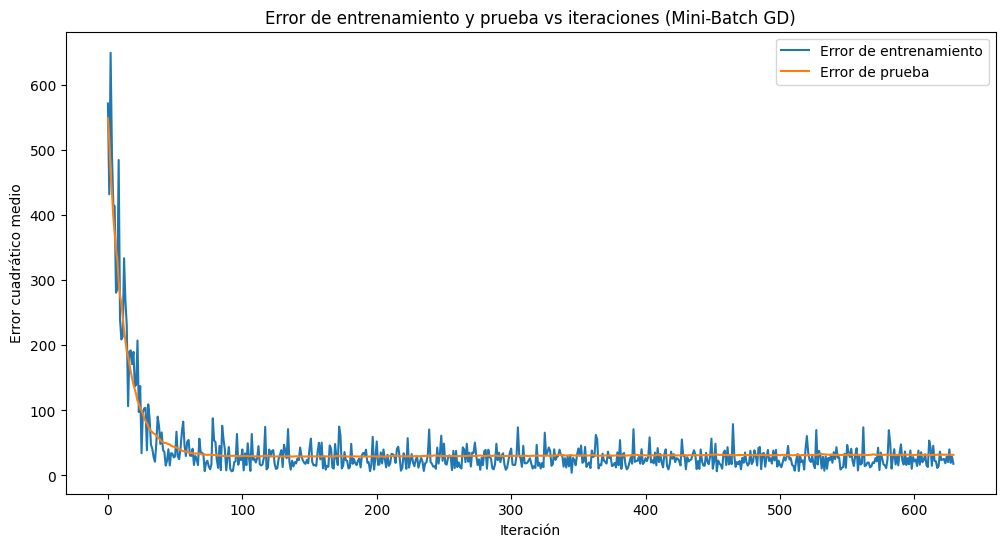

array([[22.27701739],
       [ 2.30574576],
       [ 0.91804936],
       [-0.13586903],
       [ 5.29598606],
       [-1.52385366],
       [ 1.51145571],
       [-0.40148504],
       [-2.66802029],
       [ 0.57008688],
       [-2.81862678],
       [-1.07959492],
       [ 0.27109102],
       [-5.64280131]])

In [256]:
mini_batch_gradient_descent(X_train, y_train_resh, X_test, y_test_resh, lr=0.02, epochs=30,batch_size=batch_size)

Ajustando los parámetros se logra una rápida convergencia y se minimiza el ruido que teníamos anteriormente

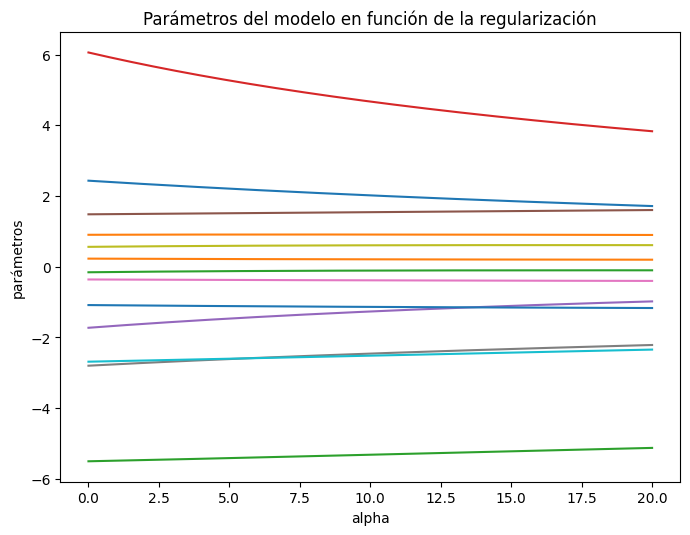

In [257]:
Ridge_CV = RidgeCV(alphas=np.linspace(0.0001, 20, 600), store_cv_values = True)
Ridge_CV.fit(X_train, y_train)

alphas = Ridge_CV.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(8, 5.84))
ax.plot(alphas, coefs)
ax.set_xlabel('alpha')
#ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.show()

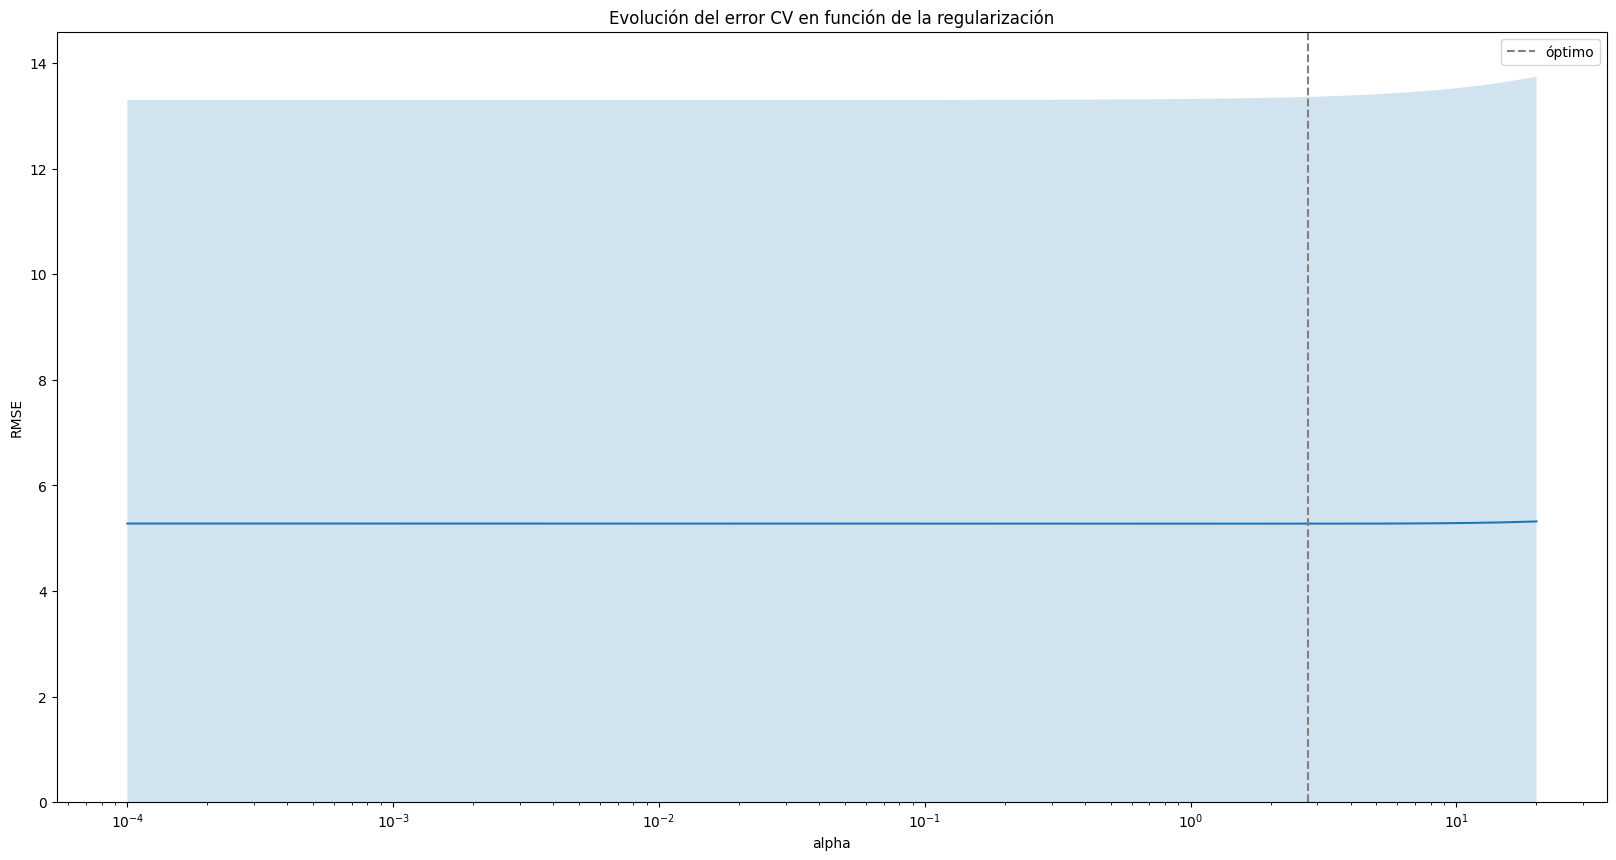

In [258]:
# Evolución del error de validación cruzada en función de alpha

# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)

mse_cv = Ridge_CV.cv_values_.reshape((-1, 600)).mean(axis=0)
mse_sd = Ridge_CV.cv_values_.reshape((-1, 600)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
optimo       = Ridge_CV.alphas[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar (fill area)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Ridge_CV.alphas, rmse_cv)
ax.fill_between(
    Ridge_CV.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [259]:
optimo

2.7713716193656097

In [260]:
Lasso_cv = LassoCV()
ElasticNet_cv = ElasticNetCV(l1_ratio = np.linspace(0.0000001,1,20))

Lasso_cv.fit(X_train, y_train)
ElasticNet_cv.fit(X_train, y_train)

print(f'Para Lassocv el alfa óptimo es: {Lasso_cv.alpha_}')
print(f'Para ElasticNet el alpha óptimo es: {ElasticNet_cv.alpha_}')
print(f'Para ElasticNet la tasa de regularización L1 óptima es: {ElasticNet_cv.l1_ratio_}')


Para Lassocv el alfa óptimo es: 0.028078292405641123
Para ElasticNet el alpha óptimo es: 0.028078292405641123
Para ElasticNet la tasa de regularización L1 óptima es: 1.0


Curiosamente, la validacion cruzada de ElasticNet nos recomienda utilizar un modelo exclusivamente con penalización L1 (Lasso)

In [261]:
lasso = Lasso(alpha = 0.028078292405641123)
ridge = Ridge(alpha = 2.7849413500806444)

for modelo in [lasso, ridge]:
  modelo.fit(X_train, y_train)
  RMSE_train = mean_squared_error(y_train, modelo.predict(X_train), squared=False)
  RMSE_test = mean_squared_error(y_test, modelo.predict(X_test), squared=False)

  print(f'RMSE de {modelo} en el conjunto de entrenamiento: {round(RMSE_train, 2)}')
  print(f'RMSE de {modelo} en el conjunto de prueba: {round(RMSE_test, 2)}\n')



RMSE de Lasso(alpha=0.028078292405641123) en el conjunto de entrenamiento: 4.99
RMSE de Lasso(alpha=0.028078292405641123) en el conjunto de prueba: 5.65

RMSE de Ridge(alpha=2.7849413500806444) en el conjunto de entrenamiento: 4.98
RMSE de Ridge(alpha=2.7849413500806444) en el conjunto de prueba: 5.65



Notamos que llegamos a valores muy similares si comparamos los modelos Lasso y Ridge, prácticamente no hay diferencia.

#Conclusión final:


En la primera etapa, realizamos un exhaustivo análisis exploratorio de datos, identificando la presencia de valores faltantes, outliers y distribuciones sesgadas. Para el manejo de los valores faltantes, optamos por la imputación con KNN en las variables cuantitativas, ya que ofrecía mejores resultados comparados con otras técnicas. Para la variable categórica, utilizamos la imputación por la moda. Además, tras analizar las distribuciones de las variables, implementamos el escalado con PowerTransformer, ya que logra una mejor normalización que ayuda a los resultados en los modelos de regresión.

En la comparación entre los modelos pudimos ver que tanto Lasso como Ridge ofrecieron resultados muy similares, con muy poca diferencia en los errores. Estas diferencias van de la mano con la importancia de seleccionar los hiperparámetros óptimos para cada técnica, ya que las variaciones en los mismos pueden impactar en la precisión del modelo final.
La aplicación de Elastic Net, también mostró un desempeño satisfactorio sugiriendonos utilizar el modelo Lasso.

En conclusión, el mejor estimador para predecir los precios de las casas en el dataset proporcionado no es único, sino que varía levemente entre Lasso y Ridge, dependiendo de los parámetros ajustados.
